### Data preprocessing ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
interest_rates = pd.read_excel('Raw_data.xlsx')

interest_rates.columns = range(interest_rates.shape[1])
interest_rates = interest_rates[[1, 7]]
interest_rates.dropna(inplace=True)
interest_rates.columns = ['date', 'interest_rate']

interest_rates['date'] = interest_rates['date'].astype('str')
interest_rates['date'] = interest_rates['date'].apply(lambda x: x.replace('(*)', ''))
interest_rates['date'] = pd.to_datetime(interest_rates['date'], dayfirst=True)

interest_rates['interest_rate'] = interest_rates['interest_rate'].astype('float')
#interest_rates['interest_rate'] = interest_rates['interest_rate'] / 100
interest_rates.reset_index(inplace=True, drop=True)

interest_rates

,date,interest_rate
0,2024-05-07,58.80
1,2024-05-06,58.87
2,2024-05-03,58.79
3,2024-05-02,58.79
4,2024-04-30,58.82
...,...,...
982,2020-04-07,37.16
983,2020-04-06,37.18
984,2020-04-03,37.12
985,2020-04-02,37.13


In [3]:
interest_rates = interest_rates.set_index('date')
interest_rates.index = pd.to_datetime(interest_rates.index)
interest_rates = interest_rates.asfreq('D')
interest_rates.reset_index(inplace=True)
interest_rates.fillna(method='ffill', inplace=True)
interest_rates

,date,interest_rate
0,2020-04-01,37.15
1,2020-04-02,37.13
2,2020-04-03,37.12
3,2020-04-04,37.12
4,2020-04-05,37.12
...,...,...
1493,2024-05-03,58.79
1494,2024-05-04,58.79
1495,2024-05-05,58.79
1496,2024-05-06,58.87


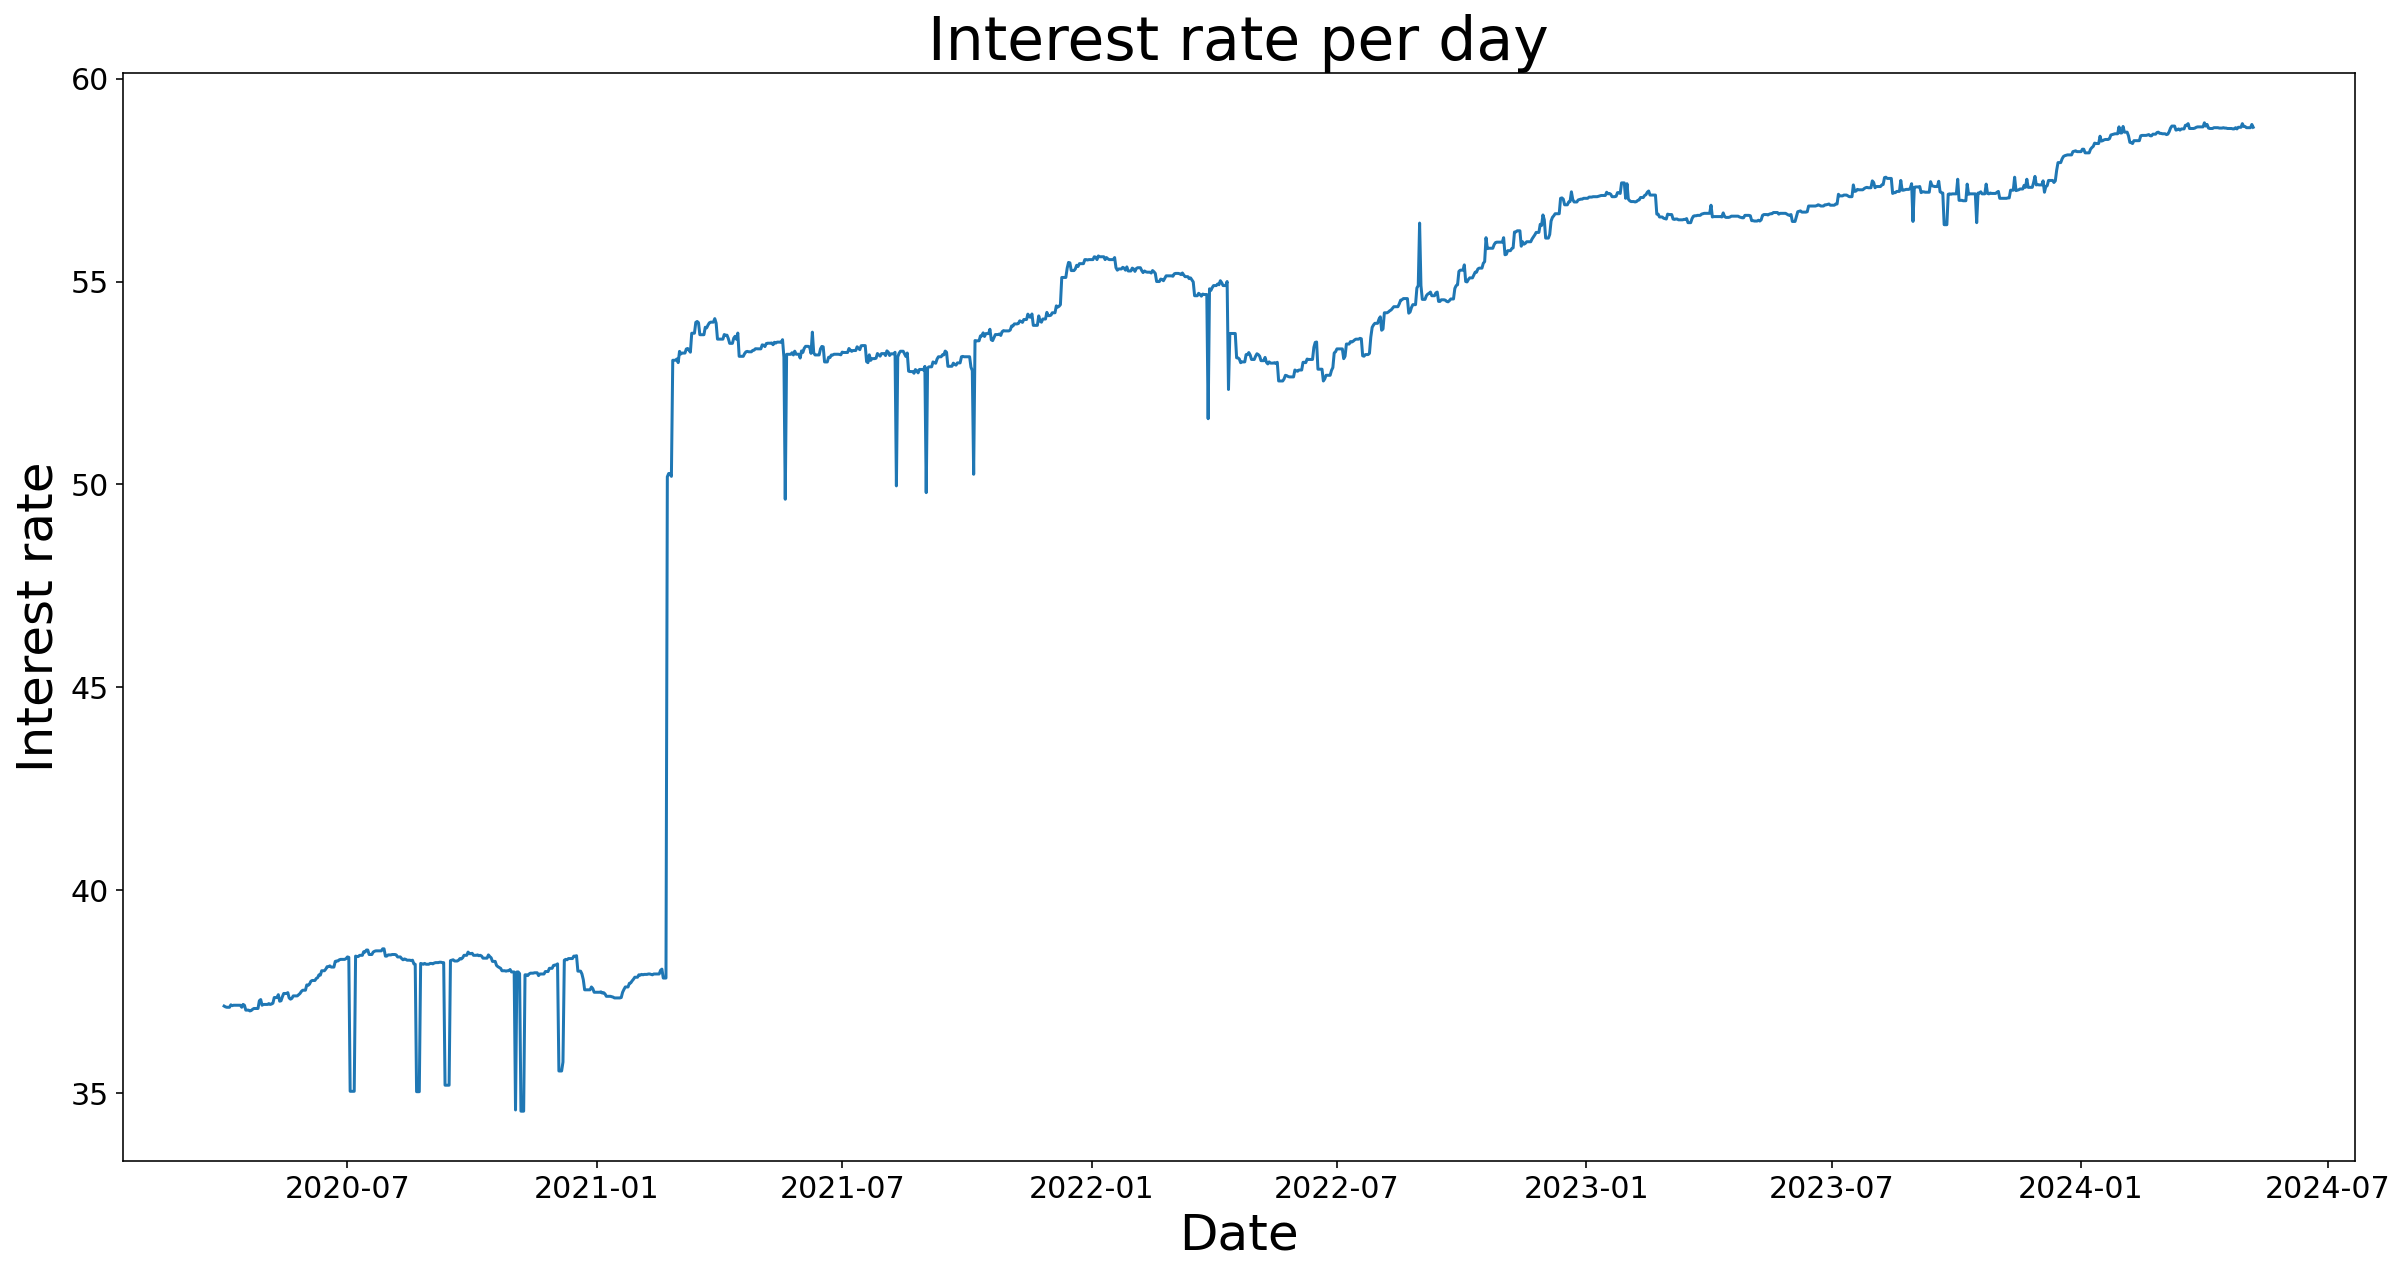

In [4]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 20, 10

sns.lineplot(data=interest_rates, x='date', y='interest_rate')
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Interest rate', fontsize = 25)
plt.title('Interest rate per day', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [5]:
interest_rates.to_csv('Interest_rates.csv', index=False)